# Basics of deep learning and neural networks

In this notebook, we will become familiar with the fundamental concepts used in deep learning. We will build simple neural networks and generate predictions with them.

We will be working with networks in order to predict transactions for a bank.

Overview:
1. Basics of deep learning and neural networks
1. The Rectified Linear Activation Function (ReLU)
1. Applying the network to many observations/rows of data
1. Deeper networks
    1. Calculating the error for one data point
    1. Scaling up to multiple data points
1. The need for optimization
1. Gradient descent

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from typing import Dict, List

## Section 1. Basics of deep learning and neural networks

We will code a **forward propagation** (prediction) for our first neural network.

Say that each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict **how many transactions the user makes in the next year**. 

In [2]:
# Hard-code input data and weights
num_accounts: int = 3
num_children: int = 5

input_data: np.ndarray = np.array([num_accounts, num_children])
    
weights: Dict[str, np.ndarray] = {'node_0': np.array([2, 4]), 
                                  'node_1': np.array([ 4, -5]), 
                                  'output': np.array([2, 7])}

# Calculate the nodes and the output of the neural network
node_0_value: np.int32 = (input_data * weights['node_0']).sum()

node_1_value: np.int32 = (input_data * weights['node_1']).sum()

hidden_layer_outputs: np.ndarray = np.array([node_0_value, node_1_value])

output: np.int32 = (hidden_layer_outputs * weights['output']).sum()

output

-39

It looks like the network generated a prediction of $-39$ transactions. This number does not make sense as we have to add an activation function as in the next section.

## Section 2. The Rectified Linear Activation Function

An "activation function" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function (called **ReLU**) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

In [3]:
def relu(input: np.int32) -> int:
    '''ReLU activation function.'''
    return max(input, 0)

In [4]:
node_0_input: np.int32 = (input_data * weights['node_0']).sum()
node_0_output: int = relu(node_0_input)

node_1_input: np.int32 = (input_data * weights['node_1']).sum()
node_1_output: int = relu(node_1_input)

hidden_layer_outputs: np.ndarray = np.array([node_0_output, node_1_output])

model_output: np.int32 = (hidden_layer_outputs * weights['output']).sum()

model_output

52

We predicted $52$ transactions. Without this activation function, you would have predicted a negative number ($-39$)! The real power of activation functions will come soon when we start tuning model weights.

## Section 3. Applying the network to many observations/rows of data

You'll now define a function called `predict_with_network()` which will generate predictions for multiple data observations.

In [5]:
def predict_with_network(input_data_row, weights):

    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    hidden_layer_outputs: np.ndarray = np.array([node_0_output, node_1_output])

    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)

    return model_output

In [6]:
input_data: List[np.ndarray] = [np.array([3, 5]),
                                np.array([ 1, -1]),
                                np.array([0, 0]),
                                np.array([8, 4])]

weights: Dict[str, np.ndarray] = {'node_0': np.array([2, 4]),
                                  'node_1': np.array([ 4, -5]),
                                  'output': np.array([2, 7])}

In [7]:
results: List[np.int32] = []
for input_data_row in input_data:
    results.append(predict_with_network(input_data_row, weights))

results

[52, 63, 0, 148]

Now, we have predicted the number of transactions for 4 observations (i.e. individuals).

## Section 4. Deeper networks

An important fact about deep networks is that they internally build up representations of the patterns in the data that are useful for making predictions. And they find increasingly complex patterns as we go through successive hidden layers of the network.

Deep learning is also sometimes called **representation learning**, because subsequent layers build increasingly sophiscticated representations of the raw data, until we get to a stage where we can make preditions. In other words, the last layers capture the most complex interactions.

The cool thing about DL is that we do not need to specify the interactions. Instead, the network gets weights that find the relevant patterns to make better predictions. It is the model training process sets them to optimize predictive accuracy.

In [8]:
def predict_with_network(input_data: np.ndarray, weights):
    """Predicts the number of transactions using a deep network."""
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into a numpy array
    hidden_0_outputs: np.ndarray = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into a numpy array
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    return(model_output)

In [9]:
input_data: np.ndarray = np.array([3, 5])

weights: Dict[str, np.ndarray] = {'node_0_0': np.array([2, 4]),
                                  'node_0_1': np.array([ 4, -5]),
                                  'node_1_0': np.array([-1,  2]),
                                  'node_1_1': np.array([1, 2]),
                                  'output': np.array([2, 7])}
    
output = predict_with_network(input_data, weights)
print(output)

182


The network generated a prediction of 182 transactions.

## Section 5. The need for optimization

### Subsection 5.1 Calculating the error for one data point

We will now see how we can improve the model accuracy by changing values of weights. For the moment, we won't use an activation function in this example. Or, we can supose that we are using an activation function that returns the input. We call such a function the identity function.

Let's say that the **true value of the target** is 3. So, the closer our prediction is to 3, the more accurate the model is for this data point.

We will use **forward propagation** to fill in the values of the hidden layer.

The **error** can be computes as follows: $$ \text{Error} = \text{Predicted target value} - \text{Actual target value}. $$

In [10]:
def predict_with_network(input_data_point: np.ndarray, weights: Dict[str, List[int]]) -> np.float64:
    node_0_input = (input_data_point * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    node_1_input = (input_data_point * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    hidden_layer_values = np.array([node_0_output, node_1_output])
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)

In [11]:
input_data: np.ndarray = np.array([0, 3])

# Sample weights
weights_0: Dict[str, List[int]] = {'node_0': [2, 1],
                                   'node_1': [1, 2],
                                   'output': [1, 1]}

# The actual target value, use to calculate the error
target_actual: int = 3

# Make prediction using original weights
model_output_0: List[np.float64] = predict_with_network(input_data, weights_0)

# Calculate error
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3)
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 0],
             'output': [1, 1]}

# Make prediction using new weights
model_output_1: List[np.float64] = predict_with_network(input_data, weights_1)

# Calculate the new error
error_1: np.int32 = model_output_1 - target_actual

print(error_0)
print(error_1)

6
0


### Subsection 5.2 Scaling up to multiple data points

We've seen how different weights will have different accuracies on a single prediction. But usually, we'll want to measure model accuracy on many points. 

We'll compare model accuracies for two different sets of weights:

In [12]:
weights_0: Dict[str, np.ndarray] = {'node_0': np.array([2, 1]), 
                                    'node_1': np.array([1, 2]), 
                                    'output': np.array([1, 1])}

weights_1: Dict[str, np.ndarray] = {'node_0': np.array([2, 1]),
                                    'node_1': np.array([1. , 1.5]),
                                    'output': np.array([1. , 1.5])}

`input_data` is a list of arrays. Each item in that list contains the data to make a single prediction. 

`target_actuals` is a list of numbers. Each item in that list is the actual value we are trying to predict.

In [13]:
input_data: List[np.ndarray] = [np.array([0, 3]), 
                                np.array([1, 2]), 
                                np.array([-1, -2]), 
                                np.array([4, 0])]

target_actuals: List[int] =  [1, 3, 5, 7]

We'll use the `mean_squared_error()` function from `sklearn.metrics`. It takes the true values and the predicted values as arguments.

In [14]:
model_output_0: List[np.int32] = []
model_output_1: List[np.int32] = []

for row in input_data:
    model_output_0.append(predict_with_network(row, weights_0))
    model_output_1.append(predict_with_network(row, weights_1))

mse_0: float = mean_squared_error(target_actuals, model_output_0)
mse_1: float = mean_squared_error(target_actuals, model_output_1)

print(f"Mean squared error with weights_0: {mse_0:.2f}")
print(f"Mean squared error with weights_1: {mse_1:.2f}")

Mean squared error with weights_0: 37.50
Mean squared error with weights_1: 49.89


It looks like `model_output_1` has a higher mean squared error.

## Section 6. Gradient descent

With gradient descent we repeatedly find a slope capturing how our loss function, $\text{Loss}(\omega)$, changes as a weight changes. We then do a small change to the weight to get to a lower point, and we repeat this process until we couldn't go downhill anymore.

If the slope is positive, going opposite to the slope means moving to lower numbers. How do we achieve this? Subtracting the slope from the current value. But a too big step might lead us astray. Thus, instead of directly subtracting the slope, we multiply the slope by a small number, called the **learning rate**, and we update the weight by the product of that multiplication: $$ \text{Updated weights} = \text{weights} - \text{slope} \times \text{learning rate}. $$

We typically use a learning rate of $0.01$. This ensures that we take small steps, such that we reliably move towards the optimal weights.

How do we find the relevant slope for each weight we need to update? Remember the chain rule of calculus... To calculate the slope for a weight, we need to multiply:
1. The slope of the loss function wrt the value at the node we feed
1. The value of the node that feeds into our weight
1. The slope of the activation function wrt the value we feed into

Let's put away the last point for a moment. The slope of the Mean-Squared loss function wrt to the prediction can be written as follows: $$2\times\text{Error}$$ where $\text{error} = \text{Predicted value} - \text{Actual value}$ as aforementioned.

In [19]:
def get_error(input_data: np.ndarray, target: int, weights: np.ndarray) -> np.int32:
    preds: np.int32 = (weights * input_data).sum()
    error: np.int32 = preds - target
    return error

In [20]:
def get_slope(input_data: np.ndarray, target: int, weights: np.ndarray) -> np.ndarray:
    error: np.int32 = get_error(input_data, target, weights)
    slope: np.ndarray = 2 * input_data * error
    return slope

In [23]:
def get_mse(input_data: np.ndarray, target: int, weights: np.ndarray) -> np.float64:
    errors: np.int32 = get_error(input_data, target, weights)
    mse: np.float64 = np.mean(errors**2)
    return mse

In [16]:
input_data: np.ndarray = np.array([1, 2, 3])
target: int = 0
weights: np.ndarray = np.array([0, 2, 1])

In [34]:
n_updates: int = 20
learning_rate: float = 0.01
mse_hist: List[np.float64] = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope
    slope: np.ndarray = get_slope(input_data, target, weights)

    # Update the weights
    weights: np.ndarray = weights - slope * learning_rate

    # Calculate MSE with new weights
    mse: np.float64 = get_mse(input_data, target, weights)
    mse_hist.append(mse)

[2.75060288e-05 5.50120575e-05 8.25180863e-05]
[-0.49999929  1.00000141 -0.49999788]
[1.98043407e-05 3.96086814e-05 5.94130221e-05]
[-0.49999949  1.00000102 -0.49999847]
[1.42591253e-05 2.85182506e-05 4.27773759e-05]
[-0.49999963  1.00000073 -0.4999989 ]
[1.02665702e-05 2.05331405e-05 3.07997107e-05]
[-0.49999974  1.00000053 -0.49999921]
[7.39193056e-06 1.47838611e-05 2.21757917e-05]
[-0.49999981  1.00000038 -0.49999943]
[5.32219001e-06 1.06443800e-05 1.59665700e-05]
[-0.49999986  1.00000027 -0.49999959]
[3.83197680e-06 7.66395361e-06 1.14959304e-05]
[-0.4999999  1.0000002 -0.4999997]
[2.7590233e-06 5.5180466e-06 8.2770699e-06]
[-0.49999993  1.00000014 -0.49999979]
[1.98649678e-06 3.97299355e-06 5.95949033e-06]
[-0.49999995  1.0000001  -0.49999985]
[1.43027768e-06 2.86055536e-06 4.29083303e-06]
[-0.49999996  1.00000007 -0.49999989]
[1.02979993e-06 2.05959986e-06 3.08939979e-06]
[-0.49999997  1.00000005 -0.49999992]
[7.41455949e-07 1.48291190e-06 2.22436785e-06]
[-0.49999998  1.00000004

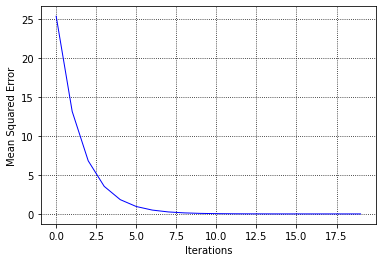

In [32]:
plt.plot(mse_hist, c='b', lw=1)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.grid(True, c='k', ls=':')
plt.show()

 As we can see, the mean-squared error decreases as the number of iterations goes up.